In [1]:
!pip install seaborn --upgrade

  Using cached https://files.pythonhosted.org/packages/10/5b/0479d7d845b5ba410ca702ffcd7f2cd95a14a4dfff1fde2637802b258b9b/seaborn-0.11.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/da/75/7bb16e22aa3f8d23a3afd065a7c933de71b67561c4561cf162fbc5d94221/matplotlib-3.3.4-cp36-cp36m-win_amd64.whl
Requirement already up-to-date: numpy>=1.15 in c:\users\cristiandg\anaconda3\lib\site-packages (from seaborn)
Requirement already up-to-date: scipy>=1.0 in c:\users\cristiandg\anaconda3\lib\site-packages (from seaborn)
Requirement already up-to-date: pandas>=0.23 in c:\users\cristiandg\anaconda3\lib\site-packages (from seaborn)
Requirement already up-to-date: cycler>=0.10 in c:\users\cristiandg\anaconda3\lib\site-packages (from matplotlib>=2.2->seaborn)
  Using cached https://files.pythonhosted.org/packages/80/c1/23fd82ad3121656b585351aba6c19761926bb0db2ebed9e4ff09a43a3fcc/pyparsing-3.0.7-py3-none-any.whl
Requirement already up-to-date: pillow>=6.2.0 in c:\users\cristiandg\

You are using pip version 9.0.1, however version 22.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn import tree

import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


Populating the interactive namespace from numpy and matplotlib


# Aplicación Decision Tree.

## 1. Dataset.
El dataset con el que vamos a trabajar es *iris*.

In [3]:
iris = load_iris()

Con estos datos construimos un dataframe.

In [4]:
Data = pd.DataFrame({'sepalLength':iris.data.T[0], 'sepalWidth':iris.data.T[1], 
                     'petalLength':iris.data.T[2], 'petalWidth':iris.data.T[3]
                     ,'target':iris.target})

In [5]:
Data.head()

,sepalLength,sepalWidth,petalLength,petalWidth,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Intuición sobre el dataset.

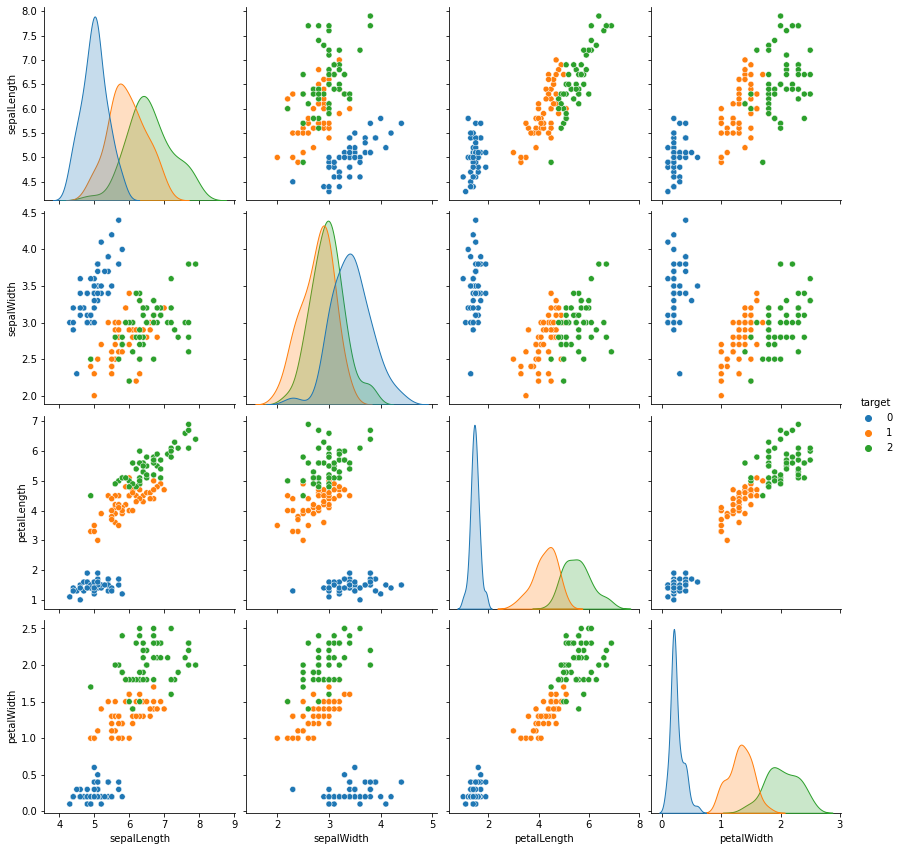

In [9]:
sns.pairplot(Data, hue="target", height=3, palette='tab10')

Del anterior diagrama de pares podemos ver que dos características que servirían en la clasificación son `petalLenght` y `petalWidth` pues estas permiten discrimiar de manera inmediata a la clase marcada como $0$. Además podemos notar que en el diagrama donde se contraponen ambas características es más proable hallar una frontera de decisión para las categorías $1$ y $2$.

## 3. División del dataset.

Para hacer el entrenamiento hacemos una división de los datos en *train_set* y *test_set*.

In [12]:
split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Data, Data["target"]): 
    strat_train_set = Data.loc[train_index] 
    strat_test_set = Data.loc[test_index]

In [13]:
#Para el entrenamiento.
X_data = strat_train_set[strat_train_set.columns[:4]]
y_data = strat_train_set['target']

#Para el test.
X_test = strat_test_set[strat_train_set.columns[:4]]
y_test = strat_test_set['target']

## 4. Modelo *Decision Tree Classifier*.

In [14]:
clf = DecisionTreeClassifier()
#Entrenamiento del modelo con los datos separados para training.
clf = clf.fit(X_data, y_data)

In [16]:
print("Evaluación del modelo.")
print("Score train: {}\nScore test: {}".format(clf.score(X_data, y_data), clf.score(X_test, y_test)))

Evaluación del modelo.
Score train: 1.0
Score test: 0.9666666666666667


Ya que las dos putuaciones son muy próximas y además son muy altas, no se sospecha de *overfittig* en el modelo.

## 5. Diagrama de Decisión.
Una ventaja de los árboles de decisión frente a las redes neuronales es que son más interpretables en cuanto a las decisiones que "toman". En particular nos apoyaremos en el diagrama de decisión.

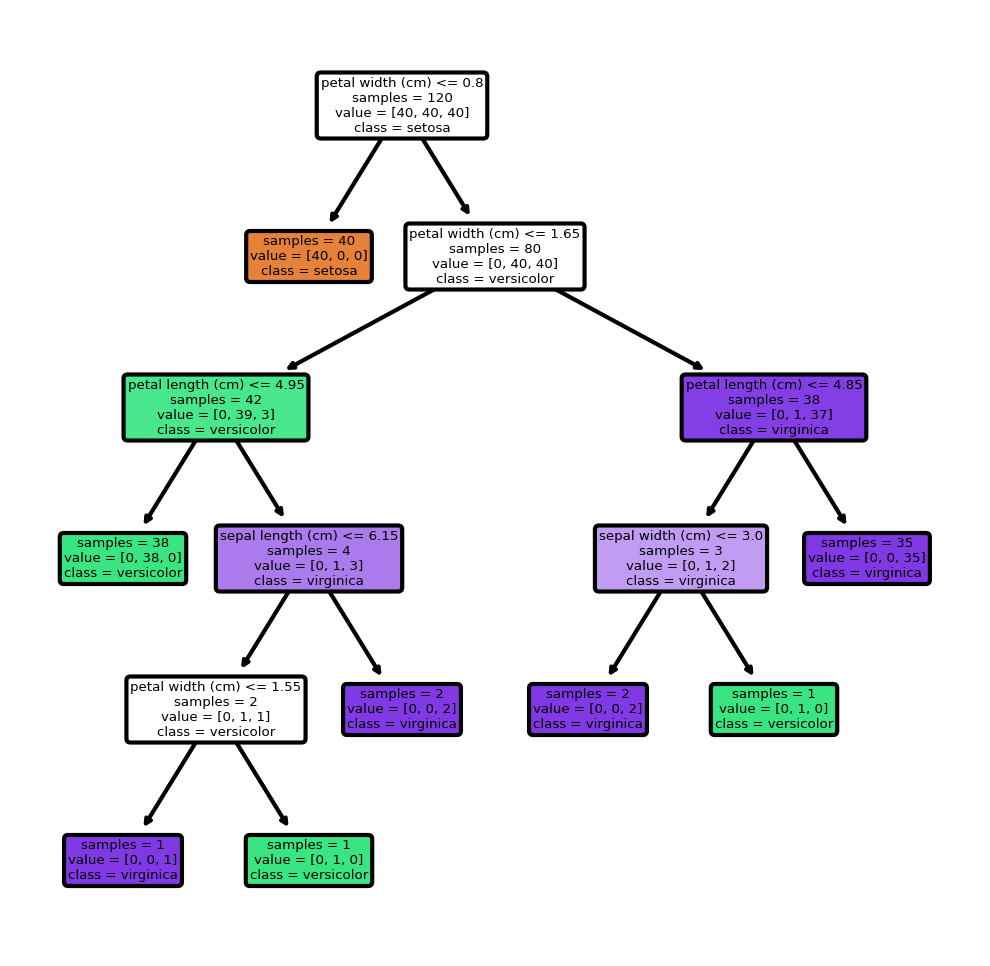

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
graph=tree.plot_tree(clf,class_names = iris.target_names,\
                feature_names = iris.feature_names,\
                impurity=False, filled=True,rounded=True )

De aquí notamos tres cosas:
* Tal como se había anticipado, el árbol toma como primera variable de decisión a la característica `petalWidth`, dejando completamente categorizada la clase "setosa".
* Con el mismo `petalWidth` empieza a establecer la clasificación para las otras dos categorías, que en conjunto con `petalLenght` ya deja etiquetada a casi toda la clase *versicolor*.
* El resultado es depurado a través del resto de características.

## 6. Características importantes.

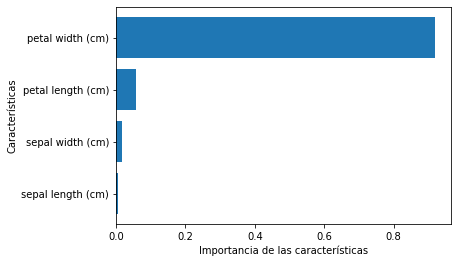

In [18]:
clf.feature_importances_
caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

Nuestro análisis anterior es confirmado por la información del anterior gráfico, allí es claro que por mucho, `petalWidth` es la característica clave en la clasificiación.

## 8. Froteras de Decisión.
Concluimos con las gráficas de las fronteras que dibuja el modelo sobre los datos para hacer el proceso de clasificación en nuevos datos.

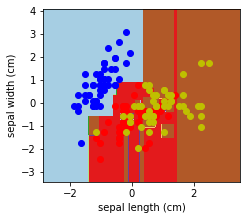

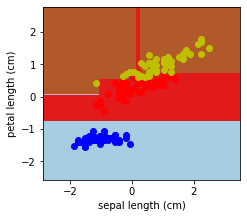

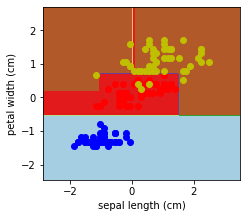

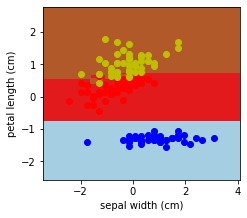

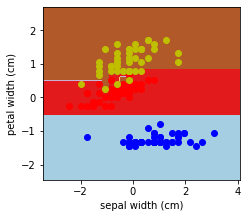

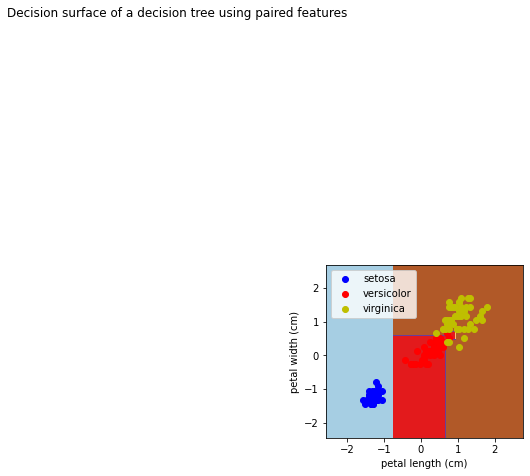

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    figure(figsize=(12,7))
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

Nuevamente, vemos que la frontera más simple, a la vez que útil, que encuetra el modelo es entre las características `petalLenght` y `petalWidth`.

## Optimizable?
Podemos intentar aplicar métodos de optimización.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'max_depth' : [1,2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

decTree = DecisionTreeClassifier()
CV_rfc = GridSearchCV(estimator=decTree, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_data, y_data)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]})

In [21]:
params = CV_rfc.best_params_
params

{'criterion': 'gini', 'max_depth': 4}

In [22]:
rfc_opt = DecisionTreeClassifier(**params)
rfc_opt.fit(X_data, y_data)
print("Evaluación del modelo con optimización.")
print("Score train: {}\nScore test: {}".format(rfc_opt.score(X_data, y_data), rfc_opt.score(X_test, y_test)))

Evaluación del modelo con optimización.
Score train: 0.9916666666666667
Score test: 0.9333333333333333


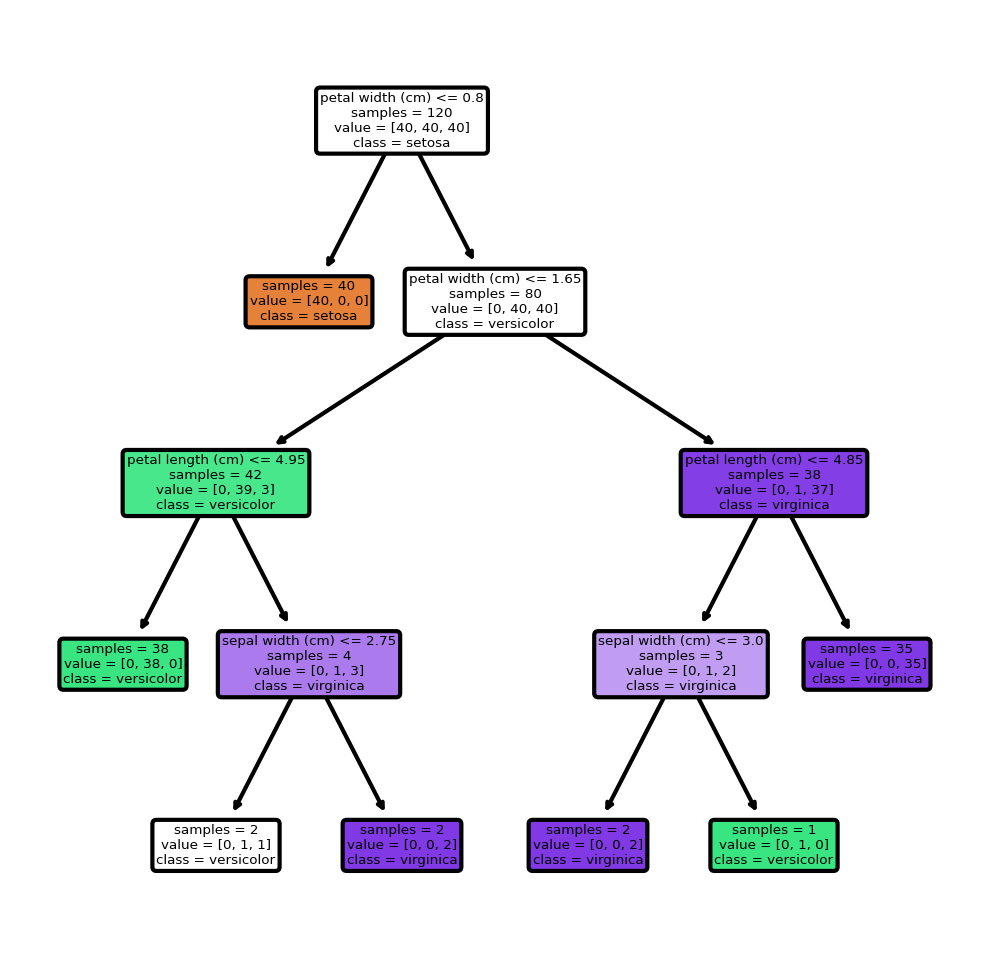

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
graph=tree.plot_tree(rfc_opt,class_names = iris.target_names,\
                feature_names = iris.feature_names,\
                impurity=False, filled=True,rounded=True )

Aunque el árbol pueda hacerse más corto, esto resulta en una pérdida de *accuracy*, por lo que se debería tener en cuenta si se quiere algo más interpretable pero menos preciso, que algo menos interpretable pero más preciso.